# Predicting Bulldozer Sales Price

In this notebook, we will explore a dataset and build machine learning models to predict the auction sale price of bulldozers 🚜. This idea and data were taken from this [Kaggle Competition](https://www.kaggle.com/c/bluebook-for-bulldozers/).

## 1. Problem definition

Fast Iron company is creating a "blue book for bulldozers", to inform their customers about what the company's heavy equipment is worth at auction. They need a model to predict this price, based on usage, equipment type and configuration.

## 2. Data

As mentioned before, the data was taken from [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/).

There are 3 main datasets:

- **Train.csv:** Training set, which contains data through the end of 2011.
- **Valid.csv:** Validation set, which contains data from January 1, 2012 - April 30, 2012.
- **Test.csv:** Test set, which contains data from May 1, 2012 - November 2012.

Key fields:

- SalesID: Unique identifier of the sale.
- MachineID: Unique identifier of a machine. One machine can be sold multiple times.
- saleprice: What the machine sold for at auction.
- saledate: Date of the sale.

## 3. Evaluation

The key evaluation metric will be the Root Mean Squared Log Error (RMSLE), between the actual and predicted auction prices. As for most regression models, the goal is to minimize the error of the prediction, when compared to the actual value.

## 4. Features and EDA

| Variable                 	| Description                                                                                                                                                                                                                     	|
|--------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| SalesID                  	|   unique identifier of a particular sale of a machine at auction                                                                                                                                                                	|
| MachineID                	|   identifier for a particular machine;  machines may have multiple sales                                                                                                                                                        	|
| ModelID                  	|   identifier for a unique machine model (i.e. fiModelDesc)                                                                                                                                                                      	|
| datasource               	|   source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.                                    	|
| auctioneerID             	|   identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.                                                                                                            	|
| YearMade                 	|   year of manufacturer of the Machine                                                                                                                                                                                           	|
| MachineHoursCurrentMeter 	|   current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale                                                                                                  	|
| UsageBand                	|   value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel. 	|
| Saledate                 	|   time of sale                                                                                                                                                                                                                  	|
| Saleprice                	|   cost of sale in USD                                                                                                                                                                                                           	|
| fiModelDesc              	|   Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor                                                                                       	|
| fiBaseModel              	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiSecondaryDesc          	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiModelSeries            	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiModelDescriptor        	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| ProductSize              	| The size class grouping for a product group. Subsets within product group.                                                                                                                                                      	|
| ProductClassDesc         	|   description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc                                                                                                                                            	|
| State                    	|   US State in which sale occurred                                                                                                                                                                                               	|
| ProductGroup             	|   identifier for top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 	|
| ProductGroupDesc         	|   description of top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 	|
| Drive_System             	| machine configuration;  typcially describes whether 2 or 4 wheel drive                                                                                                                                                          	|
| Enclosure                	| machine configuration - does machine have an enclosed cab or not                                                                                                                                                                	|
| Forks                    	| machine configuration - attachment used for lifting                                                                                                                                                                             	|
| Pad_Type                 	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Ride_Control             	| machine configuration - optional feature on loaders to make the ride smoother                                                                                                                                                   	|
| Stick                    	| machine configuration - type of control                                                                                                                                                                                         	|
| Transmission             	| machine configuration - describes type of transmission;  typically automatic or manual                                                                                                                                          	|
| Turbocharged             	| machine configuration - engine naturally aspirated or turbocharged                                                                                                                                                              	|
| Blade_Extension          	| machine configuration - extension of standard blade                                                                                                                                                                             	|
| Blade_Width              	| machine configuration - width of blade                                                                                                                                                                                          	|
| Enclosure_Type           	| machine configuration - does machine have an enclosed cab or not                                                                                                                                                                	|
| Engine_Horsepower        	| machine configuration - engine horsepower rating                                                                                                                                                                                	|
| Hydraulics               	| machine configuration - type of hydraulics                                                                                                                                                                                      	|
| Pushblock                	| machine configuration - option                                                                                                                                                                                                  	|
| Ripper                   	| machine configuration - implement attached to machine to till soil                                                                                                                                                              	|
| Scarifier                	| machine configuration - implement attached to machine to condition soil                                                                                                                                                         	|
| Tip_control              	| machine configuration - type of blade control                                                                                                                                                                                   	|
| Tire_Size                	| machine configuration - size of primary tires                                                                                                                                                                                   	|
| Coupler                  	| machine configuration - type of implement interface                                                                                                                                                                             	|
| Coupler_System           	| machine configuration - type of implement interface                                                                                                                                                                             	|
| Grouser_Tracks           	| machine configuration - describes ground contact interface                                                                                                                                                                      	|
| Hydraulics_Flow          	| machine configuration - normal or high flow hydraulic system                                                                                                                                                                    	|
| Track_Type               	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Undercarriage_Pad_Width  	| machine configuration - width of crawler treads                                                                                                                                                                                 	|
| Stick_Length             	| machine configuration - length of machine digging implement                                                                                                                                                                     	|
| Thumb                    	| machine configuration - attachment used for grabbing                                                                                                                                                                            	|
| Pattern_Changer          	| machine configuration - can adjust the operator control configuration to suit the user                                                                                                                                          	|
| Grouser_Type             	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Backhoe_Mounting         	| machine configuration - optional interface used to add a backhoe attachment                                                                                                                                                     	|
| Blade_Type               	| machine configuration - describes type of blade                                                                                                                                                                                 	|
| Travel_Controls          	| machine configuration - describes operator control configuration                                                                                                                                                                	|
| Differential_Type        	| machine configuration - differential type, typically locking or standard                                                                                                                                                        	|
| Steering_Controls        	| machine configuration - describes operator control configuration                                                                                                                                                                	|

### Import tools and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import training and validations sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False)

### Start Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

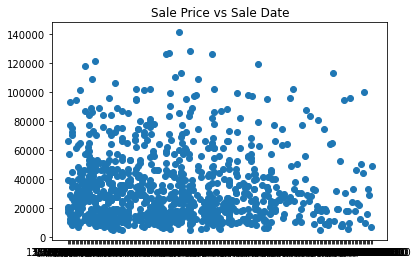

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);
ax.set(title="Sale Price vs Sale Date");

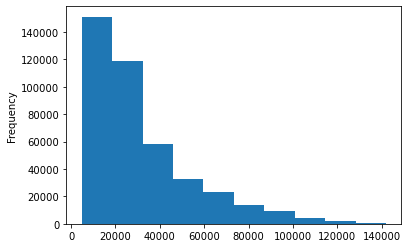

In [6]:
df['SalePrice'].plot.hist();

In [7]:
df['saledate'][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing dates

For time series data, we need to convert the dates from type Object to Date.

In [8]:
# Import data again, but parsign dates
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

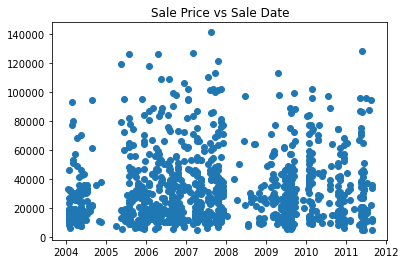

In [9]:
# If we plot again, data will be clearer
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);
ax.set(title="Sale Price vs Sale Date");

In [10]:
df.head().T # Transpose so we can see all features.

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by saledate

Since we're working with time series data, let's sort by sale date.

In [12]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Let's keep the original dataset and work over an exact copy of it.

In [13]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [14]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

# We can remove saledate
df_tmp.drop('saledate', axis=1, inplace=True)

In [15]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [16]:
# States with the most sales
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

Since we have way too many features, let's better start doing some model-driven EDA

We're gonna need to convert all features to number

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

We will also have to handle missing data

In [18]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting strings to categories

In [19]:
# Find the columns which contain strings and convert them to ordered categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [22]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now have a way to access all the features in the form of numbers. 

The next step is to take care of the missing data. Let's see the percentage of record with missing data for each feature.

In [23]:
df_tmp.isnull().sum()/len(df_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

Let's save the preprocessed data to a new file

In [24]:
# Export to csv
df_tmp.to_csv('data/bluebook-for-bulldozers/processed-data/train_tmp.csv',
              index=False)

### Split data into train and validation

Before filling missing values, we need to split the data intro train and validation subsets, to prevent future data (from validation) leaking into the train data.

In [25]:
df_tmp['saleYear']

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [26]:
df_tmp['saleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [27]:
# Split data into train and validation
df_train = df_tmp[df_tmp.saleYear != 2012].copy()
df_val = df_tmp[df_tmp.saleYear == 2012].copy()

len(df_train), len(df_val)

(401125, 11573)

### Fill missing values

First, let's create a function that takes a dataframe and a list of factor names and print how many and which ones has missing values. It also returns an array with the found factors if there are at least one.

In [28]:
def find_missing_values(df, list_of_factors):
    """
    Searches for factors with missing values in a given subset
    of a dataframe. If it finds at least one, it returns a list with 
    the name of the factors.
    
    Parameters:
     df: Dataframe to be searched.
     list_of_factors: List with the subset of factors.
    """
    missing = []
    
    for label, content in df[list_of_factors].items():
        if pd.isnull(content).sum():
            missing.append(label)
    
    print(f"There are {len(missing)} columns with missing values{':'+ chr(10) if len(missing) else '.'}")
    for el in missing:
        print(el)
        
    return missing if len(missing) > 0 else None

#### Numeric missing values

In [29]:
# Print numerical factors
numeric = []
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        numeric.append(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [30]:
# Now let's find out which of them have missing values
missing = find_missing_values(df_train, numeric)

There are 2 columns with missing values:

auctioneerID
MachineHoursCurrentMeter


Let's fill with the median, since mean is too sensitive to outliers.

In [31]:
# For train subset
for label, content in df_train[missing].items():
    
    # Add a binary column that indicates if data was missing
    df_train[f'{label}_is_missing'] = pd.isnull(content)

    # Fill missing values with the median
    df_train[label] = content.fillna(content.median())

In [32]:
# Let's check if there's no null numeric values anymore
find_missing_values(df_train, numeric)

There are 0 columns with missing values.


In [33]:
# Check how many examples were missing
df_train['auctioneerID_is_missing'].value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [34]:
# Let's do the same for the the validation data
missing_val = find_missing_values(df_val, numeric)

for label, content in df_val[missing_val].items():
    df_val[f'{label}_is_missing'] = pd.isnull(content)
    df_val[label] = content.fillna(content.median())

There are 1 columns with missing values:

MachineHoursCurrentMeter


We're gonna need to also add an `auctioneerID_is_missing` column to the validation data, so we have the exact same columns for the training and validation dataframes

In [35]:
df_val['auctioneerID_is_missing'] = False

#### Categorical missing values

In [36]:
# Check for columns which are not numeric for train data
categorical = []

for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        categorical.append(label)
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
pd.Categorical(df_train['state']).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=True)

We have a numerical representation of these in the codes properties

In [38]:
pd.Categorical(df_train['state']).codes

array([43,  8,  8, ..., 31, 31, 31], dtype=int8)

Let's find the categorical factors with missing values

In [39]:
missing_cat = find_missing_values(df_train, categorical)

There are 38 columns with missing values:

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# Turn all categorical variables into numbers and fill the missing values.
for label, content in df_train.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column that indicates if data was missing
        df_train[f'{label}_is_missing'] = pd.isnull(content)

        # Turn categories into numbers and add 1 (to turn missing into 0 insted of -1)
        df_train[label] = pd.Categorical(content).codes + 1

In [41]:
df_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [42]:
# The same for validation data
cat_missing_val = find_missing_values(df_val, categorical)

for label, content in df_val.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        df_val[f'{label}_is_missing'] = pd.isnull(content)
        df_val[label] = pd.Categorical(content).codes + 1

There are 38 columns with missing values:

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [43]:
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Let's check that we now have all data as numbers

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.8 MB


Now that we have taken care of the missing data, we can start experimenting with machine learning models.

### Building a custom evaluation function

The desired evaluation metric is RMSLE

In [45]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate on different levels
def model_scores(model):
    train_preds = model.predict(X_train) # Lookout for overfitting
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [46]:
# Split datasets into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Create a new Random Forest Regressor

Since we have too many rows, we will give each estimator of the model only 10000 samples until we find the best hyperparameters.

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=1,
                              random_state=919,
                              max_samples=10000)

In [48]:
%%time
model.fit(X_train, y_train)

CPU times: user 27.2 s, sys: 437 ms, total: 27.6 s
Wall time: 27.7 s


RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=919)

In [49]:
model_scores(model)

{'Training MAE': 5558.674899395451,
 'Validation MAE': 7174.361975287306,
 'Training RMSLE': 0.25775046677650415,
 'Valid RMSLE': 0.2951636972470515,
 'Training R^2': 0.8609861837634141,
 'Valid R^2': 0.8333419984956177}

### Hyperparameter tuning

We'll use RandomizedSearchCV to try different hyperparameters and find the optimal ones to be used to train the whole train subset.

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparamters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=919,
                                                    max_samples=10000),
                              param_distributions=rf_grid,
                              n_iter=400,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed: 144.5min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=919),
                   n_iter=400,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
# Best hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [52]:
# Evaluate the RandomizedSearch model
model_scores(rs_model)

{'Training MAE': 5642.928735272909,
 'Validation MAE': 7230.236319500355,
 'Training RMSLE': 0.2608373524694065,
 'Valid RMSLE': 0.2956047504945353,
 'Training R^2': 0.8565085074766974,
 'Valid R^2': 0.8301131076262743}

### Train the model with the best hyperparameters

We will now train a new Random Forest Regressor with the hyperparameters found in `rs_model.best_params_`. We will now leave the `max_samples` parameter to its default value of `None`.

In [53]:
best_model = RandomForestRegressor(n_jobs=-1,
                                   n_estimators=90,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features=0.5,
                                   max_depth=None,
                                   random_state=919)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, n_estimators=90, n_jobs=-1,
                      random_state=919)

In [54]:
model_scores(best_model)

{'Training MAE': 1563.3769983310826,
 'Validation MAE': 5932.545063701911,
 'Training RMSLE': 0.08337331853259292,
 'Valid RMSLE': 0.24594554277656414,
 'Training R^2': 0.9880042134456916,
 'Valid R^2': 0.8828852673160688}

### Make predictions with `best_model`

In [55]:
# Import test data
df_test = pd.read_csv('./data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [57]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

We will need to match the factor count and make them all numeric.

### Preprocessing the data

In [58]:
def preprocess_data(df):
    """
    Process the data as needed and return the transormed dataframe
    """
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add binary column that indicates if there was missing data
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Turn categorical into numbers and fill missings
        else:
            df[label+'_is_missing'] = pd.isnull(content)
            # We add 1 to the category code
            df[label] = pd.Categorical(content).codes + 1
                
        
    
    return df

In [59]:
# Preprocessing test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [60]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


We see that we have a different number of columns.

In [61]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

We could edit our `preprocess_data` function to iterate over the array of the factors with missing values that we previously have. However, since we have just one missing column, we can simply add a new column with all `False` values.

In [62]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Now, we're ready to make predictions

In [63]:
# Make predictions on the test data
test_preds = best_model.predict(df_test)

Let's format the predictions in the required format.

In [64]:
final_preds = pd.DataFrame()
final_preds['SalesID'] = df_test['SalesID']
final_preds['SalesPrice'] = test_preds
final_preds

,SalesID,SalesPrice
0,1227829,21300.000000
1,1227844,19225.555556
2,1227847,51566.666667
3,1227848,67011.111111
4,1227863,38359.444444
...,...,...
12452,6643171,45575.000000
12453,6643173,14050.000000
12454,6643184,14861.111111
12455,6643186,17444.444444


In [65]:
# Export prediction data
final_preds.to_csv('./data/predictions/bulldozers-price-predictions.csv',
                    index=False)

### Feature Importance

Let's figure out which features were the most important to predict the sale price.

In [66]:
best_model.feature_importances_

array([3.64599375e-02, 2.30926668e-02, 3.99502617e-02, 2.06361068e-03,
       4.96486559e-03, 1.96331348e-01, 4.00512328e-03, 1.43118329e-03,
       4.25108115e-02, 4.29289537e-02, 6.00462133e-02, 4.88061703e-03,
       1.54961478e-02, 1.43984089e-01, 4.38049879e-02, 9.09381442e-03,
       2.47686454e-03, 2.78068774e-03, 3.42772654e-03, 7.18436854e-02,
       1.15255570e-03, 7.48086296e-05, 1.60333607e-03, 1.84763620e-04,
       1.60303677e-03, 4.65702474e-05, 1.98435447e-03, 6.56701290e-03,
       1.21438166e-03, 1.03902641e-03, 3.10051778e-03, 3.31984515e-03,
       5.37252504e-03, 1.77784576e-03, 2.12644941e-03, 6.40578549e-03,
       1.31539499e-03, 1.01273318e-02, 1.53255451e-03, 1.63631386e-03,
       1.21235930e-03, 1.45538096e-03, 2.43905563e-03, 8.25802389e-04,
       6.38042716e-04, 5.56724304e-04, 4.19619243e-04, 2.51095109e-03,
       9.36369070e-04, 2.59911295e-04, 2.88863167e-04, 7.27614154e-02,
       6.10375255e-03, 9.48334156e-03, 5.03844075e-03, 1.35473727e-02,
      

In [67]:
# Plotting function
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    # Plot
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

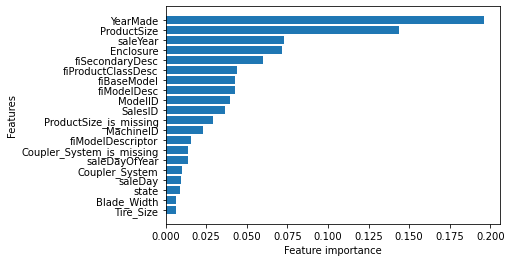

In [68]:
plot_features(X_train.columns, best_model.feature_importances_)

In [69]:
df['ProductSize'].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [70]:
df['Enclosure'].value_counts()
# Does a machine has an enclosed cab or not

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

## 6. Conclusions

We managed to build a Random Forest Regressor with a **Root Mean Squared Log Error (RMSLE) score of ~0.24**, which is an indicator of how far the predicted value are from the actual value, without penalizing big differences, as we are trying to predict huge numbers.

We algo found out that the most important feature is the **Year in which the bulldozer was made**, which is expected, since most assets devaluate with time. Product size is also important, followed by some other bulldozers configurations, such as Enclosure.

As a recommendation for further exploration, some other models, such as **Support Vector Regressor or SGD Regressor** may help in decreasing the RMSLE and, generally, to get better results.